## Plot Phi spatial distribution for a particular layer

In [1]:
import xarray as xr
import numpy as np
import netCDF4
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.colors as mcolors
from matplotlib import cm,gridspec,rc
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

In [2]:
USER = os.environ['USER']

In [3]:
path = f'/glade/scratch/{USER}/DPLE-results'
#path = f'/glade/work/{USER}/O2pred'
filename = f'{path}/DPLE-FOSI_hindcast_Phi_Eo_space_vertical_mean_1948-2017_yearly.nc'
ds = xr.open_dataset(filename)

In [4]:
path = f'/glade/work/{USER}/MAPP/ETOPO'
filename = f'{path}/Etopo1_Bed_0_65N_170E_40W.nc'
bathy = xr.open_dataset(filename)
lon_e = bathy['lon']
for ii in range(len(lon_e)):
    if lon_e[ii] > 0:
        lon_e[ii] = lon_e[ii] - 360.
lat_e = bathy['lat']
depth_e = bathy['depth']

In [5]:
mask_bathy = (depth_e >= 0.)*1.
mask_bathy = np.ma.array(mask_bathy, mask=mask_bathy == 0.)
lon_e, lat_e = np.meshgrid(lon_e, lat_e)
lon_e = np.ma.array(lon_e, mask=mask_bathy.mask)
lat_e = np.ma.array(lat_e, mask=mask_bathy.mask)

In [6]:
lon = ds['TLONG']-360.
lat = ds['TLAT']
lat_min = 15;   lat_max = 65
lon_min = -190; lon_max = -40
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#labb = ['a','b','c','d','e','f','g','h','i']
labb = ['a $\phi_{(0-200m)}$','b $\phi_{(0-200m)}$','c $\phi_{(0-200m)}$','d $\phi_{(200-600m)}$','e $\phi_{(200-600m)}$','f $\phi_{(200-600m)}$','g $\Delta\phi$','h $\Delta\phi$','i $\Delta\phi$']

In [7]:
path = f'/glade/u/home/{USER}/O2prediction/Prediction/notebooks/data'
filename = '%s/LME_shapes.gmt' % path
file1 = open(filename,'r')
lines = file1.readlines()
#
nbox = -1
lonn = [[] for ii in range(194)]
latt = [[] for ii in range(194)]
ln = 9
for line in lines[ln:]:
    sl = line.split()
    if len(sl)==2 and sl[0] == '#':
        nbox = nbox + 1
    elif len(sl)==2 and sl[0] != '#':
        lonn[nbox-1].append(np.float(sl[0]))
        latt[nbox-1].append(np.float(sl[1]))
##
pp180 = []
for pp in range(len(lonn)):
    if len(lonn[pp])>0:
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        if len(np.where(np.abs(lon1 + 180.)<1e-4)[0])>0:
            if len(lonn[pp])<4:
                pp180.append(pp)
##
lon0 = []
lat0 = []
nn = 0
for pp in range(len(lonn)):
    if len(lonn[pp])!=0:
        nn = nn + 1
        if np.min(lonn[pp])>0:
            lon1 = np.array(lonn[pp]) - 360.
        else:
            lon1 = np.array(lonn[pp])
        lat1 = np.array(latt[pp])
        lon1 = np.ma.array(lon1,mask=False)
        lat1 = np.ma.array(lat1,mask=False)
        if pp in pp180[1:]:
#        if len(np.where(np.abs(lon1+180.)<1e-4)[0]) > 0:
            #print(pp)
            aa = np.where(np.abs(lon1+180.)<1e-4)[0]
            lon1.mask[aa] = True
            lat1.mask[aa] = True
        lon0.append(lon1)
        lat0.append(lat1)

In [8]:
cmin = 0.;cmax = 6.0;clev = 40.
dc = (cmax - cmin)/clev; vct = np.arange(cmin, cmax+dc, dc)
pal_normt = mcolors.BoundaryNorm(vct, ncolors=256, clip = False)
#
cmin = -3.;cmax = 3.;clev = 30.
dc = (cmax - cmin)/clev; vcs = np.arange(cmin, cmax+dc, dc)
pal_norms = mcolors.BoundaryNorm(vcs, ncolors=256, clip = False)
#
cmin = 0.;cmax=1.;clev=1.
dc = (cmax - cmin)/clev; vcn = np.arange(cmin, cmax+dc, dc)
pal_normn = mcolors.BoundaryNorm(vcn, ncolors=256, clip = False)

In [9]:
layer1 = '0-200m'
layer2 = '200-600m'

0.2375622943908868 1.2544726259440695 2.2555230548605323
0.30235799774885697 1.608088965217925 2.7719403756782413
0.17397592446428284 3.726285753253938 9.475940227508545


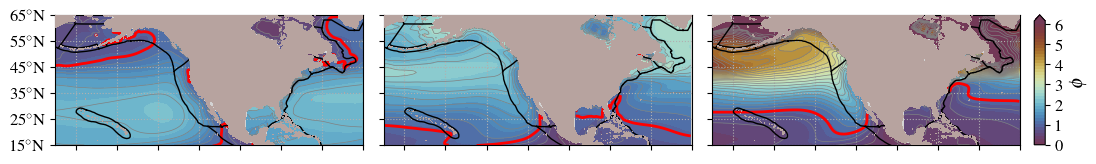

In [10]:
fig = plt.figure(figsize=[11, 5])
gs = gridspec.GridSpec(3, 3)
for cc in range(0,3):
    xi = np.int(np.floor(cc/3))
    xj = cc - xi*3
    ax = fig.add_axes([0.043+xj*0.29875, 0.08+(2-xi)*0.1, 0.28, 0.26])
    if cc == 0:
        Phi = ds[f'Phi_0_{layer1}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 1:
        Phi = ds[f'Phi_6_{layer1}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 2:
        Phi = ds[f'Phi_12_{layer1}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 3:
        Phi = ds[f'Phi_0_{layer2}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 4:
        Phi = ds[f'Phi_6_{layer2}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 5:
        Phi = ds[f'Phi_12_{layer2}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 6:
        Phi = (ds[f'Phi_0_{layer2}']-ds[f'Phi_0_{layer1}']).isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 7:
        Phi = (ds[f'Phi_6_{layer2}']-ds[f'Phi_6_{layer1}']).isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 8:
        Phi = (ds[f'Phi_12_{layer2}']-ds[f'Phi_12_{layer1}']).isel(year=range(6,70)).mean(dim='year') # 1954-2017
    #
    xrr = np.arange(lon_min-10,lon_max+10)
    ax.fill_between(xrr,np.ones(len(xrr))*(lat_min-10),np.ones(len(xrr))*(lat_max+10),color='lightgray')
    for pp in range(len(lon0)):
        ax.plot(lon0[pp],lat0[pp],color='k',linewidth=1.,zorder=19)
    if cc in [0,1,3,4]:
        cd1 = ax.contourf(lon,lat,Phi,vct,shading='nearest',cmap=cmc.romaO_r,norm=pal_normt,extend='max')
        ax.contour(lon,lat,Phi,np.arange(0,7.02,0.2),linewidths=.5,colors='gray')
        ax.contour(lon,lat,Phi,[1],linewidths=2.,colors='r')
    elif cc in [2,5]:
        cd1 = ax.contourf(lon,lat,Phi,vct,shading='nearest',cmap=cmc.romaO_r,norm=pal_normt,extend='max')
        ax.contour(lon,lat,Phi,np.arange(0,7.02,0.2),linewidths=.5,colors='gray')
        ax.contour(lon,lat,Phi,[1],linewidths=2.,colors='r')
    else:
        cd2 = ax.contourf(lon,lat,Phi,vcs,shading='nearest',cmap=new_cmaps,norm=pal_norms,extend='both')
        ax.contour(lon,lat,Phi,np.arange(-4,4.02,0.2),linewidths=.5,colors='gray')    
    ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4, zorder=20)
    ax.set_xlim(lon_min,lon_max)
    ax.set_ylim(lat_min,lat_max)
    ax.set_xticks(np.arange(-180, -30, 20))
    ax.set_yticks(np.arange(15, 66, 10))
    print(np.nanmin(Phi), np.nanmean(Phi), np.nanmax(Phi))
    #
    xtl = []
    for ii in np.arange(-180, -30, 20):
        if ii < -180:
            ii = ii + 360
            ff = 'E'
        elif ii >= -180:
            ff = 'W'
        elif np.abs(ii-0)<1e-5:
            ff = ''
        xtl.append('%d$^\circ$%s' % (abs(ii),ff))
    ytl = []
    for jj in np.arange(15, 66, 10):
        if jj < 0:
            ff = 'S'
        elif jj > 0:
            ff = 'N'
        elif np.abs(jj-0)<1e-5:
            ff = ''
        ytl.append('%d$^\circ$%s' % (abs(jj),ff))
    if cc in [6,7,8]:
        ax.set_xticklabels([],fontsize=12,fontweight='bold',rotation=20)
    else:
        ax.set_xticklabels([],fontsize=12,fontweight='bold',rotation=20)
    if cc in [0,3,6]:
        ax.set_yticklabels(ytl,fontsize=12,fontweight='bold',rotation=0)
    else:
        ax.set_yticklabels([],fontsize=12,fontweight='bold',rotation=0)
    ax.grid(linestyle='dotted',zorder=11)
# colorbar
cbaxes = fig.add_axes([0.933, 0.28, 0.01, 0.26])
cb = plt.colorbar(cd1,orientation="vertical",cax=cbaxes,extend='max',ticks=range(0,7,1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label=r"$\phi$",fontsize=14,fontweight='bold')
#
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/Figure2_FOSI_hindcast_Phi_{layer1}_vertical_mean_time_mean.png'
plt.savefig(outfile,dpi=400,transparent=True)
plt.show()

0.014937343281577371 0.6503182720743719 1.8912628971582413
0.032180233300278555 1.1346266521266206 2.6692490052750886
0.04828100225481009 2.459106765512364 8.229993347656784


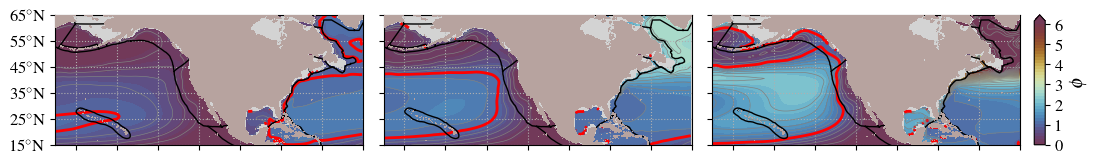

In [11]:
fig = plt.figure(figsize=[11, 5])
gs = gridspec.GridSpec(3, 3)
for cc in range(3,6):
    xi = np.int(np.floor(cc/3))
    xj = cc - xi*3
    ax = fig.add_axes([0.043+xj*0.29875, 0.08+(2-xi)*0.3, 0.28, 0.26])
    if cc == 0:
        Phi = ds[f'Phi_0_{layer1}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 1:
        Phi = ds[f'Phi_6_{layer1}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 2:
        Phi = ds[f'Phi_12_{layer1}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 3:
        Phi = ds[f'Phi_0_{layer2}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 4:
        Phi = ds[f'Phi_6_{layer2}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 5:
        Phi = ds[f'Phi_12_{layer2}'].isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 6:
        Phi = (ds[f'Phi_0_{layer2}']-ds[f'Phi_0_{layer1}']).isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 7:
        Phi = (ds[f'Phi_6_{layer2}']-ds[f'Phi_6_{layer1}']).isel(year=range(6,70)).mean(dim='year') # 1954-2017
    elif cc == 8:
        Phi = (ds[f'Phi_12_{layer2}']-ds[f'Phi_12_{layer1}']).isel(year=range(6,70)).mean(dim='year') # 1954-2017
    #
    xrr = np.arange(lon_min-10,lon_max+10)
    ax.fill_between(xrr,np.ones(len(xrr))*(lat_min-10),np.ones(len(xrr))*(lat_max+10),color='lightgray')
    for pp in range(len(lon0)):
        ax.plot(lon0[pp],lat0[pp],color='k',linewidth=1.,zorder=19)
    if cc in [0,1,3,4]:
        cd1 = ax.contourf(lon,lat,Phi,vct,shading='nearest',cmap=cmc.romaO_r,norm=pal_normt,extend='max')
        ax.contour(lon,lat,Phi,np.arange(0,7.02,0.2),linewidths=.5,colors='gray')
        ax.contour(lon,lat,Phi,[1],linewidths=2.,colors='r')
    elif cc in [2,5]:
        cd1 = ax.contourf(lon,lat,Phi,vct,shading='nearest',cmap=cmc.romaO_r,norm=pal_normt,extend='max')
        ax.contour(lon,lat,Phi,np.arange(0,7.02,0.2),linewidths=.5,colors='gray')
        ax.contour(lon,lat,Phi,[1],linewidths=2.,colors='r')
    else:
        cd2 = ax.contourf(lon,lat,Phi,vcs,shading='nearest',cmap=new_cmaps,norm=pal_norms,extend='both')
        ax.contour(lon,lat,Phi,np.arange(-4,4.02,0.4),linewidths=.5,colors='gray')
    
    ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4, zorder=20)
    ax.set_xlim(lon_min,lon_max)
    ax.set_ylim(lat_min,lat_max)
    ax.set_xticks(np.arange(-180, -30, 20))
    ax.set_yticks(np.arange(15, 66, 10))
    print(np.nanmin(Phi), np.nanmean(Phi), np.nanmax(Phi))
    #
    xtl = []
    for ii in np.arange(-180, -30, 20):
        if ii < -180:
            ii = ii + 360
            ff = 'E'
        elif ii >= -180:
            ff = 'W'
        elif np.abs(ii-0)<1e-5:
            ff = ''
        xtl.append('%d$^\circ$%s' % (abs(ii),ff))
    ytl = []
    for jj in np.arange(15, 66, 10):
        if jj < 0:
            ff = 'S'
        elif jj > 0:
            ff = 'N'
        elif np.abs(jj-0)<1e-5:
            ff = ''
        ytl.append('%d$^\circ$%s' % (abs(jj),ff))
    if cc in [6,7,8]:
        ax.set_xticklabels([],fontsize=12,fontweight='bold',rotation=20)
    else:
        ax.set_xticklabels([],fontsize=12,fontweight='bold',rotation=20)
    if cc in [0,3,6]:
        ax.set_yticklabels(ytl,fontsize=12,fontweight='bold',rotation=0)
    else:
        ax.set_yticklabels([],fontsize=12,fontweight='bold',rotation=0)
    ax.grid(linestyle='dotted',zorder=11)
# colorbar
cbaxes = fig.add_axes([0.933, 0.38, 0.01, 0.26])
cb = plt.colorbar(cd1,orientation="vertical",cax=cbaxes,extend='max',ticks=range(0,7,1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label=r"$\phi$",fontsize=14,fontweight='bold')
#
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/Figure2_FOSI_hindcast_Phi_{layer2}_vertical_mean_time_mean.png'
plt.savefig(outfile,dpi=400,transparent=True)
plt.show()

0.20789562633070574 1.2544726259440688 2.2759252389272056
0.26442750709547486 1.6080889652179258 2.803144454956055
0.1507401539075635 3.7262857532539373 9.78157075246175


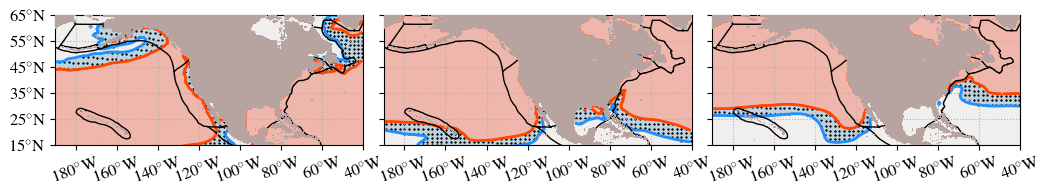

In [10]:
fig = plt.figure(figsize=[11, 5])
gs = gridspec.GridSpec(3, 3)
for cc in range(0,3):
    xi = np.int(np.floor(cc/3))
    xj = cc - xi*3
    ax = fig.add_axes([0.043+xj*0.29875, 0.08+(2-xi)*0.3, 0.28, 0.26])
    if cc == 0:
        Phi = ds[f'Phi_0_{layer1}'].isel(year=range(6,70))# 1954-2017
    elif cc == 1:
        Phi = ds[f'Phi_6_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 2:
        Phi = ds[f'Phi_12_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 3:
        Phi = ds[f'Phi_0_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 4:
        Phi = ds[f'Phi_6_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 5:
        Phi = ds[f'Phi_12_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 6:
        Phi = ds[f'Phi_0_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 7:
        Phi = ds[f'Phi_6_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 8:
        Phi = ds[f'Phi_12_{layer1}'].isel(year=range(6,70)) # 1954-2017
    #
    Phi_men = Phi.mean(dim='year').values
    Phi_std = Phi.std(dim='year').values
    Phi_up = Phi_men + 3*Phi_std
    Phi_dn = Phi_men - 3*Phi_std
    mask_mn = Phi_men >= 1
    mask_up = Phi_up >= 1
    mask_dn = Phi_dn >= 1
    mask_jj = ~(~mask_up+mask_dn)
    #
    xrr = np.arange(lon_min-10,lon_max+10)
    ax.fill_between(xrr,np.ones(len(xrr))*(lat_min-10),np.ones(len(xrr))*(lat_max+10),color='lightgray')
    for pp in range(len(lon0)):
        ax.plot(lon0[pp],lat0[pp],color='k',linewidth=1.,zorder=19)
    cd1 = ax.contourf(lon,lat,mask_jj*1.,cmap=cm.Blues,norm=pal_normn,extend='min',alpha=0.6)
    cd1 = ax.contourf(lon,lat,mask_dn*1.,cmap=cm.Reds,norm=pal_normn,extend='min',alpha=0.4)
    ax.contour(lon,lat,Phi_up,[1],linewidths=2.,colors='dodgerblue')
    ax.contour(lon,lat,Phi_dn,[1],linewidths=2.,colors='orangered')
    lon_jj = np.ma.array(lon,mask=~mask_jj)
    lat_jj = np.ma.array(lat,mask=~mask_jj)
    ax.scatter(lon_jj[::4, ::2], lat_jj[::4, ::2], s=5, marker='.', color='k', alpha=1, linewidth=.5)
    #
    ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4, zorder=20)
    ax.set_xlim(lon_min,lon_max)
    ax.set_ylim(lat_min,lat_max)
    ax.set_xticks(np.arange(-180, -30, 20))
    ax.set_yticks(np.arange(15, 66, 10))
    print(np.nanmin(Phi), np.nanmean(Phi), np.nanmax(Phi))
    #
    xtl = []
    for ii in np.arange(-180, -30, 20):
        if ii < -180:
            ii = ii + 360
            ff = 'E'
        elif ii >= -180:
            ff = 'W'
        elif np.abs(ii-0)<1e-5:
            ff = ''
        xtl.append('%d$^\circ$%s' % (abs(ii),ff))
    ytl = []
    for jj in np.arange(15, 66, 10):
        if jj < 0:
            ff = 'S'
        elif jj > 0:
            ff = 'N'
        elif np.abs(jj-0)<1e-5:
            ff = ''
        ytl.append('%d$^\circ$%s' % (abs(jj),ff))
    ax.set_xticklabels(xtl,fontsize=12,fontweight='bold',rotation=20)
    if cc in [0,3,6]:
        ax.set_yticklabels(ytl,fontsize=12,fontweight='bold',rotation=0)
    else:
        ax.set_yticklabels([],fontsize=12,fontweight='bold',rotation=0)
    ax.grid(linestyle='dotted',zorder=11)
#
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/Figure2_FOSI_hindcast_Phi_{layer1}_vertical_mean_time_mean_std_diff_Ac_specific.png'
plt.savefig(outfile,dpi=400,transparent=True)
plt.show()

-0.009247473978346517 0.650318272074372 2.0063900465383013
-0.02160376989486178 1.134626652126621 2.694914263251607
-0.05017804737369905 2.4591067655123635 8.576999177750103


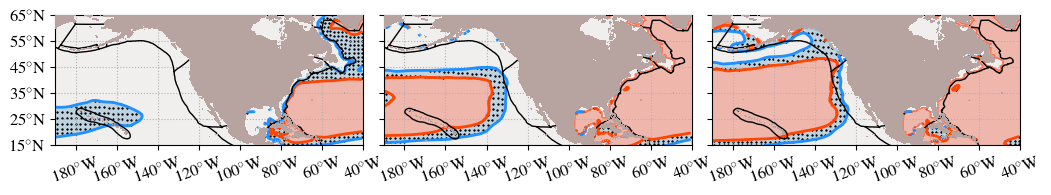

In [14]:
fig = plt.figure(figsize=[11, 5])
gs = gridspec.GridSpec(3, 3)
for cc in range(3,6):
    xi = np.int(np.floor(cc/3))
    xj = cc - xi*3
    ax = fig.add_axes([0.043+xj*0.29875, 0.08+(2-xi)*0.3, 0.28, 0.26])
    if cc == 0:
        Phi = ds[f'Phi_0_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 1:
        Phi = ds[f'Phi_6_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 2:
        Phi = ds[f'Phi_12_{layer1}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 3:
        Phi = ds[f'Phi_0_{layer2}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 4:
        Phi = ds[f'Phi_6_{layer2}'].isel(year=range(6,70)) # 1954-2017
    elif cc == 5:
        Phi = ds[f'Phi_12_{layer2}'].isel(year=range(6,70)) # 1954-2017
    #
    Phi_men = Phi.mean(dim='year').values
    Phi_std = Phi.std(dim='year').values
    Phi_up = Phi_men + 3*Phi_std
    Phi_dn = Phi_men - 3*Phi_std
    mask_mn = Phi_men >= 1
    mask_up = Phi_up >= 1
    mask_dn = Phi_dn >= 1
    mask_jj = ~(~mask_up+mask_dn)
    #
    xrr = np.arange(lon_min-10,lon_max+10)
    ax.fill_between(xrr,np.ones(len(xrr))*(lat_min-10),np.ones(len(xrr))*(lat_max+10),color='lightgray')
    for pp in range(len(lon0)):
        ax.plot(lon0[pp],lat0[pp],color='k',linewidth=1.,zorder=19)
    cd1 = ax.contourf(lon,lat,mask_jj*1.,cmap=cm.Blues,norm=pal_normn,extend='min',alpha=0.6)
    cd1 = ax.contourf(lon,lat,mask_dn*1.,cmap=cm.Reds,norm=pal_normn,extend='min',alpha=0.4)
    ax.contour(lon,lat,Phi_dn,[1],linewidths=2.,colors='orangered')
    ax.contour(lon,lat,Phi_up,[1],linewidths=2.,colors='dodgerblue')
    lon_jj = np.ma.array(lon,mask=~mask_jj)
    lat_jj = np.ma.array(lat,mask=~mask_jj)
    ax.scatter(lon_jj[::4, ::2], lat_jj[::4, ::2], s=5, marker='.', color='k', alpha=1, linewidth=.5)
    #
    ax.pcolor(lon_e,lat_e,mask_bathy,shading='nearest',cmap=cm.terrain_r,vmin=.5,vmax=4, zorder=20)
    ax.set_xlim(lon_min,lon_max)
    ax.set_ylim(lat_min,lat_max)
    ax.set_xticks(np.arange(-180, -30, 20))
    ax.set_yticks(np.arange(15, 66, 10))
    print(np.nanmin(Phi), np.nanmean(Phi), np.nanmax(Phi))
    #
    xtl = []
    for ii in np.arange(-180, -30, 20):
        if ii < -180:
            ii = ii + 360
            ff = 'E'
        elif ii >= -180:
            ff = 'W'
        elif np.abs(ii-0)<1e-5:
            ff = ''
        xtl.append('%d$^\circ$%s' % (abs(ii),ff))
    ytl = []
    for jj in np.arange(15, 66, 10):
        if jj < 0:
            ff = 'S'
        elif jj > 0:
            ff = 'N'
        elif np.abs(jj-0)<1e-5:
            ff = ''
        ytl.append('%d$^\circ$%s' % (abs(jj),ff))
    ax.set_xticklabels(xtl,fontsize=12,fontweight='bold',rotation=20)
    if cc in [0,3,6]:
        ax.set_yticklabels(ytl,fontsize=12,fontweight='bold',rotation=0)
    else:
        ax.set_yticklabels([],fontsize=12,fontweight='bold',rotation=0)
    ax.grid(linestyle='dotted',zorder=11)
#
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/Figure2_FOSI_hindcast_Phi_{layer2}_vertical_mean_time_mean_std_diff.png'
plt.savefig(outfile,dpi=400,transparent=True)
plt.show()